# Distanciel X22M090 : Probabilités pour les sciences exactes, II

Pour avancer dans le notebook et exécuter les cellules : taper Shift+Enter ou utiliser la barre d'outils ci-dessus et choisir Cell, Run Cell and select Below

## Consignes

Vous répondez aux questions en modifiant ce notebook. Normalement vous devriez pouvoir vous contenter d'écrire dans les cellules prévues en dessous de chaque question, cellule texte ou cellule code. N'hésitez pas à insérez des cellules (de type Markdown pour du texte et de type code pour du code, voir menu "Cell"). 

Ensuite vous enregistrez ce notebook sous le nom groupe_Nom_Prenom_X22M090-2.ipynb (comme 4xx_Untel_Luc_X22M090-2.ipynb) ainsi qu'en html, et vous rendez les deux fichiers sur Madoc. Enregistrez souvent !

## Générateurs aléatoires
On l'a signalé dans le premier distanciel, on peut simuler des tirages à l'aide de la commande va.rvs (random variable). Le nom suggère que l'ordinateur effectue un tirage aléatoire. On est obligé ici d'insister sur le fait que cela n'est pas possible. L'ordinateur que vous utilisez est déterministe, ou du moins tout est fait pour que ce soit le cas : pour des entrées égales, l'algorithme du programme produit toujours la même sortie. On se retrouve donc avec l'oxymore "aléa déterministe".

Une idée possible pour obtenir des tirages aléatoires de nombres consiste, au lieu de chercher à se débarrasser du bruit, de le prendre comme source d'aléa. La solution utilisée dans nos commandes Python est d'utiliser un _générateur pseudo-aléatoire_, le "pseudo" cherchant ici à atténuer l'effet de l'oxymore. En voici le principe, très simple. On définit une suite par une relation de récurrence $x_{n+1}=f(x_n)$ et par son premier terme $x_0=s$. La suite est entièrement déterminée par son premier terme : une fois la fonction $f$ fixée, ce processus fournit toujours la même suite de nombres pour le même choix de $s$. On choisit $s$ dans un gros ensemble fini $S$, et tout l'aléa est contenu dans ce choix de $s$, qui peut dépendre du bruit et de toutes sorte de données de votre ordinateur : heure, température etc.  La lettre s vient de l'anglais _seed_, et on parle de _graine_ pour le terme initial $s$. Il est fréquent de produire les premiers termes de suites qui sont en fait périodiques, ce qui est loin de l'aléatoire, mais avec une période longue (vraiment longue, $2^{64}$). 

La commande ```randn``` du paquetage ```numpy.random``` est un tel générateur de nombres pseudo-aléatoire (ou PRNG). 

In [4]:
from numpy import *
from numpy.random import *
#from scipy.stats import *
a=randn(4)
print(a)
b=randn(4)
print(b)

[0.50626896 0.80033898 0.17250908 1.29409414]
[-0.518202    0.26769845  1.28294043  0.34911238]


**Question** - Exécuter de nouveau les commandes de la cellule précédente. Pourquoi la même commande ```randn(4)``` répétée ne donnent-elle pas deux fois le même résultat ?

parceque randn(4) génère 4 nombres aléatoires

On peut préciser la graine initiale :

In [5]:
from numpy import *
print("mais si on impose la graine :")
seed(0) ; a0=randn(6)
print(a0)
print("on retrouve :")
seed(0) ; b0=randn(6)
print(b0)

mais si on impose la graine :
[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788]
on retrouve :
[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788]


**Question** - Essayer ce code.  Pourquoi la commande ```randn(6)``` répétée donnent-elle maintenant deux fois le même résultat ?

le seed donne le point de depart et vu que on donne le meme point de départ(meme valeur à seed:0) donc on aura le meme résultat à chaque fois 
randn genère un nombre pseudo aléatoire

**Question** - Essayer aussi la commande random. Que produit-elle ?

In [6]:
from numpy import *
print("mais si on impose la graine :")
seed(0) ; a0=random.random()
print(a0)
print("on retrouve :")
seed(0) ; b0=random.random()
print(b0)

mais si on impose la graine :
0.5488135039273248
on retrouve :
0.5488135039273248


from numpy import *
print("mais si on impose la graine :")
seed(0) ; a0=random
print(a0)
print("on retrouve :")
seed(0) ; b0=rand
print(b0)

Les plus curieux peuvent aller voir dans le menu d'aide de numpy (Help/NumPy Reference) ; on y apprend que la fonction randn est importée de Matlab, qui n'est pas du domaine public ("open source"), contrairement par exemple à la fonction ```rand``` dans Scilab. Cherchez avec votre moteur de recherche favori les mots :
```matlab période randn``` pour trouver la valeur de la période indiquée plus haut, et profitez-en pour apprendre la signification de _ziggurat_ après celle d'_oxymore_.

En guise d'application, le code ci-dessous définit une fonction ```binomiale``` à partir de la fonction ```random``` à valeurs dans $[0,1[$. Elle doit donner le même résultat que la fonction ```binomial``` du paquetage ```scipy.stats``` utilisée en partie I du distanciel.

In [7]:
def Bernoulli(p) :
    if random.random() < p :
        return 1
    else :
        return 0
def binomiale(n,p):
    u=0
    for i in range(n) :
        u=u+Bernoulli(p)
    return u
print("binomiale", binomiale(3600,1/6),", et pour binomial", binomial(3600,1/6))

binomiale 604 , et pour binomial 552


# **Question** - Est-ce normal que les résultats soient différents ?

c'est normal que les résultats soient différents car random génère un seul nombre tandis que randn peut généré plusieurs à la fois

Pour pouvoir mieux comparer des simulations, il peut être agréable de visualiser les données. Nous allons donc maintenant tracer des histogrammes. 

## Tracé d'un histogramme

Pour les graphiques, chacun a ses habitudes et ses commandes favorites. Par exemple, ```linspace(départ, fin, nombre d'éléments)``` permet d’obtenir un tableau 1D allant d’une valeur de départ à une valeur de fin avec un nombre donné d’éléments.
Dans la cellule suivante, ajustez le dernier argument de np.linspace pour obtenir des valeurs entières dans le tableau x, et vérifiez en exécutant.

In [8]:
import numpy as np 
x = np.linspace(500, 700, 2)
print(x)

[500. 700.]


On trace maintenant un histogramme en utilisant le paquetage ```pyplot```, la simulation intégrée dans la commande ```rvs```, et la fonction ```binom``` du paquetage ```scipy.stats``` :

In [35]:
from scipy.stats import binom
from matplotlib.pyplot import *
va = binom(100,0.3)
# simuler un tirage
x=va.rvs(size=40)
# afficher le tirage et son histogramme
print(x)
H=hist(x)
print(H)
#show()

[41 32 22 34 25 36 28 25 29 26 26 30 33 25 28 26 32 24 25 35 29 29 33 34
 34 26 29 30 29 24 28 27 35 30 26 26 31 27 20 33]
(array([ 2.,  2., 10.,  5.,  8.,  3.,  6.,  3.,  0.,  1.]), array([20. , 22.1, 24.2, 26.3, 28.4, 30.5, 32.6, 34.7, 36.8, 38.9, 41. ]), <BarContainer object of 10 artists>)


Les options de ```hist``` permettent d'adapter l'histogramme. Par exemple bins désigne le nombre d'intervalles en abscisse. 

**Question** - Expérimentez en variant les valeurs du paramètre ```bin```, par exemple :

(array([1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 3., 0., 0., 1.,
       0., 0., 4., 0., 0., 5., 0., 0., 2., 0., 7., 0., 0., 3., 0., 0., 2.,
       0., 0., 1., 0., 2., 0., 0., 1., 0., 0., 2., 0., 0., 2., 0., 1.]), array([21.  , 21.36, 21.72, 22.08, 22.44, 22.8 , 23.16, 23.52, 23.88,
       24.24, 24.6 , 24.96, 25.32, 25.68, 26.04, 26.4 , 26.76, 27.12,
       27.48, 27.84, 28.2 , 28.56, 28.92, 29.28, 29.64, 30.  , 30.36,
       30.72, 31.08, 31.44, 31.8 , 32.16, 32.52, 32.88, 33.24, 33.6 ,
       33.96, 34.32, 34.68, 35.04, 35.4 , 35.76, 36.12, 36.48, 36.84,
       37.2 , 37.56, 37.92, 38.28, 38.64, 39.  ]), <BarContainer object of 50 artists>)


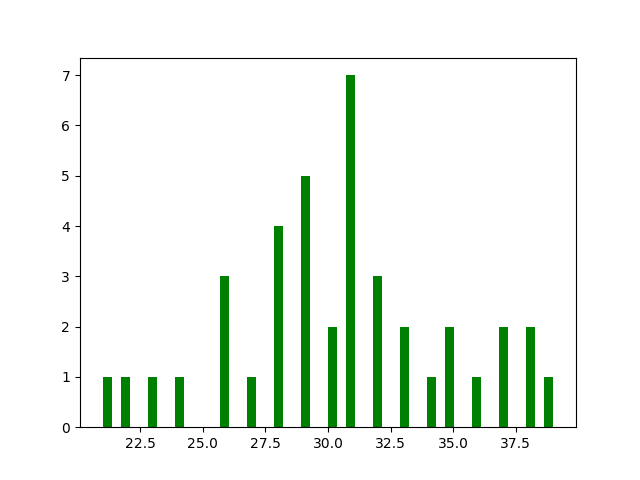

In [40]:
va = binom(100,0.3)
x=va.rvs(size=40)
G=hist(x, bins=50, facecolor='green')
print(G)
show()

(array([1., 0., 3., 1., 4., 7.]), array([24, 25, 26, 27, 28, 29, 30]), <BarContainer object of 6 artists>)


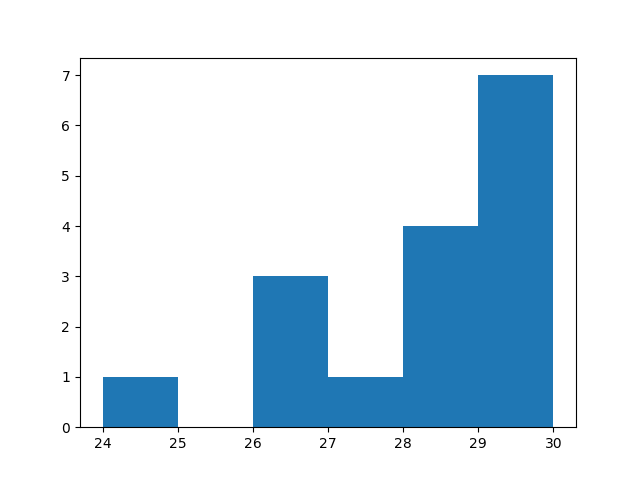

In [41]:
H=hist(x, bins=range(24, 31))
print(H)
show()

In [ ]:
bin designe l'espace entre les diagrammes. Plus bin est petit plus les diagrammes sont larges

On peut essayer de comparer l'histogramme avec la fonction de densité.

**Question** - Compléter le code de la cellule suivante avec le code que vous avez saisie dans la cellule précédente pour visualiser les deux en une seule figure permettant la comparaison. Vous devrez ajuster l'échelle en y de manière à tenir compte de votre choix de valeur pour ```bin``` dans la cellule précédente.

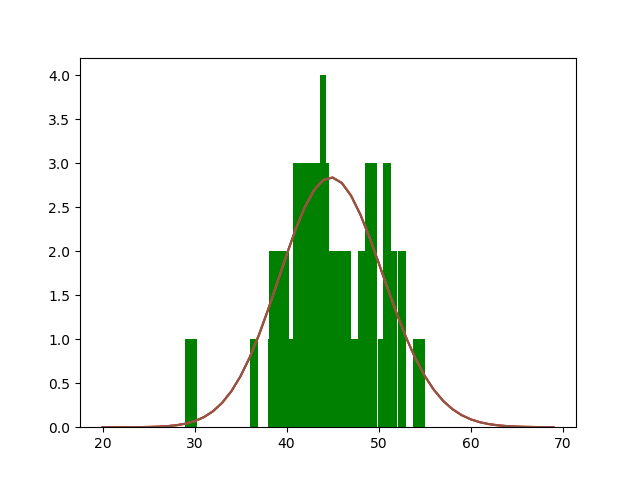

In [9]:
#import matplotlib.pyplot as plt
#import numpy as np
#import scipy.stats

va = binom(150,0.3)
x = va.rvs(size=20)
G = hist(x, bins=20, facecolor='green')
x2 = range(20,70)
y = va.pmf(x2)*40
plot(x2, y)
show()

range(530, 670)


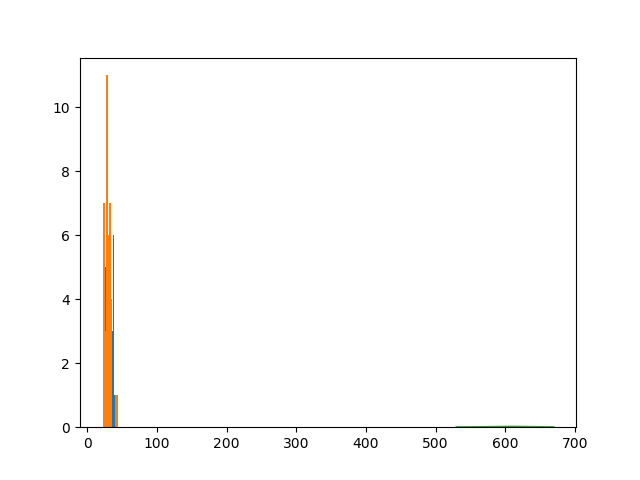

In [20]:
va = binom(3600,1/6)
x=range(530,670)
print(x)
y=va.pmf(x)
P=plot(x, y)
print(P)
show()


_Remarque - La fonction de répartition de la partie I du distanciel est plus commode à manipuler que les histogrammes, ce serait déjà mieux. Plusieurs méthodes de validation des données simulées ont été développées. Les tests d'uniformité ou les méthodes usuelles (fonction inverse, rejet) dépassent les objectifs de ce distanciel._

Pour terminer, quelques exercices avec les commandes ```cdf``` et ```ppf```.

**Question** - Calculer la probabilité que le nombre de 1 dans les 3600 tirages soit compris entre 480 et 720.

In [21]:
from scipy.stats import norm
#loc) spécifie la moyenne. Le mot clé scale ( scale) spécifie l'écart type.
#function. cdf(x, loc=0, scale=1)
import scipy.stats as st
st.norm.cdf(480) - st.norm.cdf(720)

0.0

**Question** - Quelle valeur du nombre de 1 obtenus devient moins probable que 5% ? Comparez avec les valeurs donnés en cours en utilisant les inégalités de Markov et de Tchebychev.

**Question** - Exécuter la commande suivante. Devrait-on trouver 0.5 ?

In [22]:
va.cdf(600)

0.5109006624882217

Ici, nous essayons de connaître le taux de réussite lorsque 3600 essais répétés sont effectués avec une probabilité de réussite de 60%.
La sortie 0.5109006624882217 montre que les chances d’obtenir 600 succès ou moins en 1600 essais sont de près de 51%.

Enregistrez votre travail en notebook groupe_Nom_Prenom_X22M090-2.ipynb et en html groupe_Nom_Prenom_X22M090-2.html, et rendez les deux fichiers comme devoir sur madoc.
    Cette activité de prise en main doit êtrte finalisée individuellement. Indiquez si vous avez travaillé en groupe en signalant avec qui dans la cellule ci-dessous.

## Fin